In [3]:

import fastbook
fastbook.setup_book()

In [4]:
#hide
from fastbook import *
from fastai.vision.widgets import *

In [5]:
import os
key = os.environ.get('AZURE_SEARCH_KEY', '(input_key)')

In [6]:
search_images_bing

<function fastbook.search_images_bing(key, term, min_sz=128, max_images=150)>

In [22]:
results = search_images_bing(key, 'husky dog')
ims = results.attrgot('contentUrl')
len(ims)

150

In [48]:
ims

(#150) ['http://cdn0.wideopenpets.com/wp-content/uploads/2017/05/AdobeStock_107723771.jpeg','http://wallpapercave.com/wp/EHKrebF.jpg','https://images.pexels.com/photos/2853130/pexels-photo-2853130.jpeg?cs=srgb&dl=photo-of-siberian-husky-puppy-2853130.jpg&fm=jpg','https://www.thesprucepets.com/thmb/2K97c7-05caG1cASgKYAvlD1hV4=/4000x2667/filters:fill(auto,1)/husky-dog-lying-in-the-915124768-34493760df9648f99961b50a16c39529.jpg','https://cmkt-image-prd.freetls.fastly.net/0.1.0/ps/2841102/910/1363/m2/fpnw/wm1/qxgzevpsllxrgihwah9psul2xdyob6lzz3f0bgsznpqgqkibqhsyfwqhbrftxagr-.jpg?1497375236&s=39e6f58a3cec649835db327c611d2015','http://canineowners.com/wp-content/uploads/2013/04/Siberian-Husky.jpg','https://wallup.net/wp-content/uploads/2018/10/07/237983-siberian-husky-dog.jpg','https://petdogowner.com/wp-content/uploads/2019/09/gray-adult-siberian-husky-dog-sibirsky-husky-PMH6X2T-2.jpg','http://2.bp.blogspot.com/-et5afQ66Jbo/UHoHA8ySYjI/AAAAAAAAAHg/wvdGeKII6UQ/s1600/891067607.jpg','http://fc0

In [29]:
dest = 'images/husky.jpg'


In [30]:
os.path.abspath(dest)

'C:\\Users\\Minty\\Documents\\Fastai\\Fastai_notebooks\\clean\\images\\husky.jpg'

In [44]:
dest = 'images/husky.jpg'
download_url(ims[0], dest)

Path('images/husky.jpg')

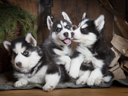

In [45]:
im = Image.open(dest)
im.to_thumb(128,128)

In [66]:
dog_types = 'husky','samoyed','newfoundland'
path = Path('dogs')

In [67]:
if not path.exists():
    path.mkdir()
    for o in dog_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, f'{o} dog')
        download_images(dest, urls=results.attrgot('contentUrl'))

In [70]:
get_image_files??

In [71]:
path

Path('dogs')

In [68]:
fns = get_image_files(path)
fns

(#437) [Path('dogs/husky/00000000.jpeg'),Path('dogs/husky/00000001.jpg'),Path('dogs/husky/00000002.jpeg'),Path('dogs/husky/00000003.jpg'),Path('dogs/husky/00000005.jpg'),Path('dogs/husky/00000006.jpg'),Path('dogs/husky/00000007.jpg'),Path('dogs/husky/00000008.jpg'),Path('dogs/husky/00000009.jpg'),Path('dogs/husky/00000010.jpg')...]

In [72]:
type(fns)

fastcore.foundation.L

In [73]:
failed = verify_images(fns)
failed

(#1) [Path('dogs/husky/00000085.jpg')]

In [76]:
failed.map(Path.unlink);

### Sidebar: Getting Help in Jupyter Notebooks

### End sidebar

## From Data to DataLoaders

In [77]:
dogs = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [81]:
dogs

In [82]:
dls = dogs.dataloaders(path)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


In [85]:
dls[0]

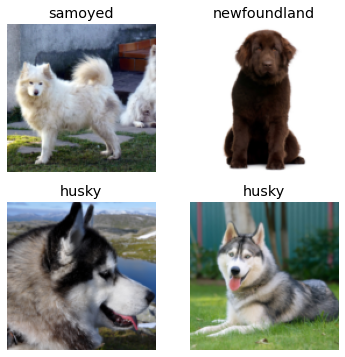

In [96]:
dls.train.show_batch(max_n=4)

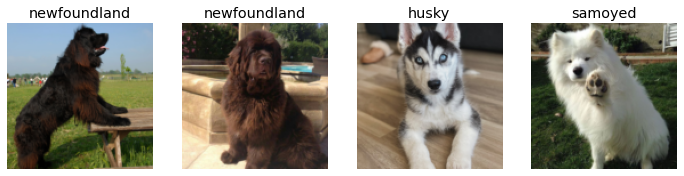

In [86]:
dls.valid.show_batch(max_n=4, nrows=1)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


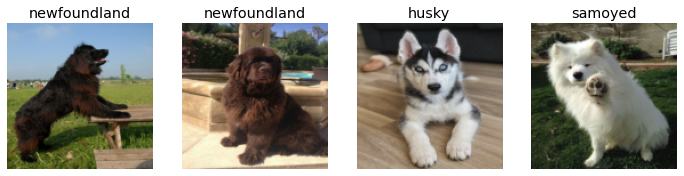

In [102]:
dogs = dogs.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = dogs.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


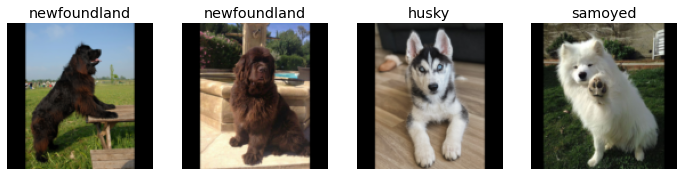

In [105]:
dogs = dogs.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = dogs.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


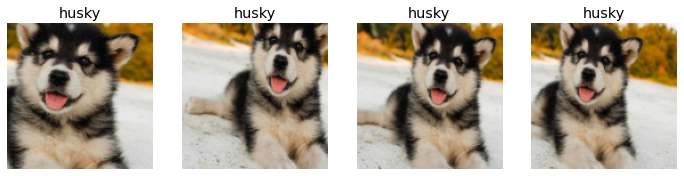

In [111]:
dogs = dogs.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = dogs.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

### Data Augmentation

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


C:\Users\Minty\miniconda3\lib\site-packages\torch\_tensor.py:1051: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  ..\aten\src\ATen\native\BatchLinearAlgebra.cpp:766.)
  ret = func(*args, **kwargs)


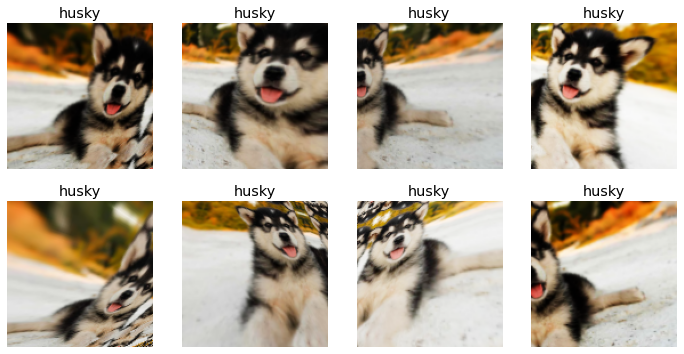

In [112]:
dogs = dogs.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = dogs.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

## Training Your Model, and Using It to Clean Your Data

In [113]:
dogs = dogs.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = dogs.dataloaders(path)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


In [114]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\Minty/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.294528,0.065102,0.022989,00:38


epoch,train_loss,valid_loss,error_rate,time
0,0.160771,0.014894,0.011494,00:45
1,0.094024,0.002619,0.000000,00:42
2,0.068902,0.001685,0.000000,00:42
3,0.053275,0.002045,0.000000,00:41


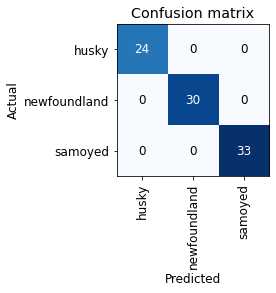

In [115]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

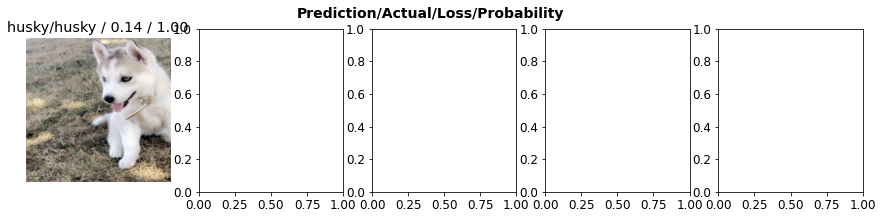

In [116]:
interp.plot_top_losses(5, nrows=1)

In [117]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [118]:
#hide
# for idx in cleaner.delete(): cleaner.fns[idx].unlink()
# for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

## Turning Your Model into an Online Application

### Using the Model for Inference

In [119]:
learn.export()

In [120]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [121]:
learn_inf = load_learner(path/'export.pkl')

In [122]:
learn_inf.predict('images/husky.jpg')

('husky', TensorBase(0), TensorBase([1.0000e+00, 8.1733e-07, 5.5753e-07]))

In [123]:
learn_inf.dls.vocab

['husky', 'newfoundland', 'samoyed']

### Creating a Notebook App from the Model

In [124]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [125]:
#hide
# For the book, we can't actually click an upload button, so we fake it
btn_upload = SimpleNamespace(data = ['images/husky.jpg'])

In [126]:
img = PILImage.create(btn_upload.data[-1])

In [127]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [128]:
pred,pred_idx,probs = learn_inf.predict(img)

In [129]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: husky; Probability: 1.0000')

In [130]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [131]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [132]:
#hide
#Putting back btn_upload to a widget for next cell
btn_upload = widgets.FileUpload()

In [133]:
VBox([widgets.Label('Select your Pup!'), 
      btn_upload, btn_run, out_pl, lbl_pred])

### Turning Your Notebook into a Real App

In [ ]:
#hide
# !pip install voila
# !jupyter serverextension enable --sys-prefix voila 